---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T2.6.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### In this tutorial, we explore autoencoders for (i) basic image reconstruction and (ii) image denoising.

# Intro to Autoencoders



An autoencoder is a type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## Load the dataset
We will train the autoencoder using the Fashion MNIST dataset. Each image in this dataset is a grayscale image of dimensions 28 x 28 pixels.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


---


**Question 1**: Why are we not interested in the class labels?

**Answer:**

---

## 1. Basic autoencoder
![Basic autoencoder results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)





### Define Model
We define an autoencoder with two Dense layers:

1.   an `encoder`, which compresses the images into a 64 dimensional latent vector
2.   a `decoder`, that reconstructs the original image from the latent space.



To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


# instantiate model
autoencoder = Autoencoder(latent_dim)

---


**Question 2**: Explain the significance of the two layers in the decoder unit of the above defined autoencoder architecture.

**Answer:**


---

We compile the autoencoder model with Adam optimizer and MSE Loss function.

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train Model
Next, we train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.0241 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

### Evaluation on Test Dataset
Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
autoencoder.evaluate(x_test,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0090


0.008970733731985092

### Visualize Reconstructed Images
In the below cell, we visualize 10 original images from the test dataset along with their reconstructed versions.

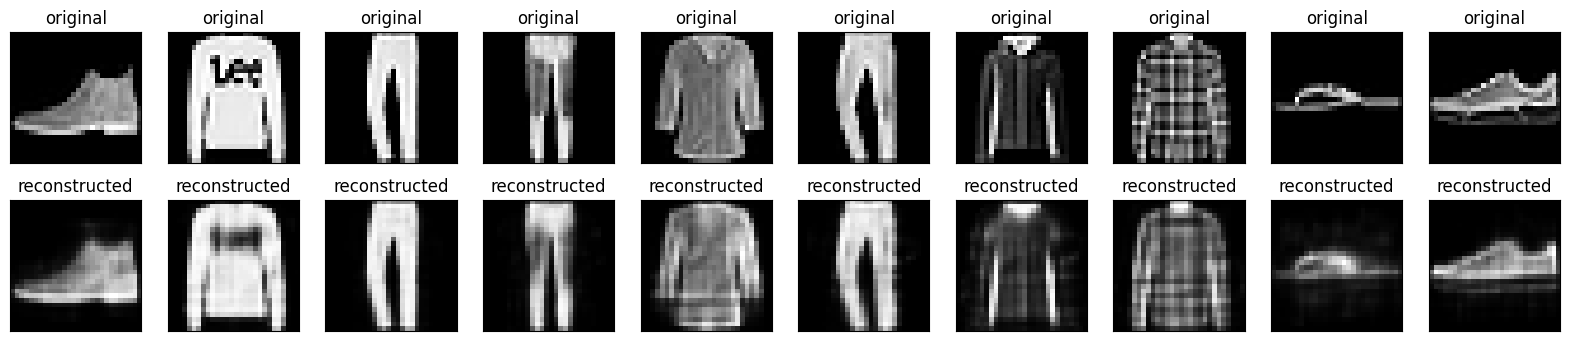

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Test same model on different dataset

Let's test our autoencoder model which was trained on the fashion MNIST dataset on the original MNIST dataset and observe how well it performs.

We load only the test dataset for evaluation.

In [ ]:
(_, _), (x_test_new, _) = mnist.load_data()


x_test_new = x_test_new.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
autoencoder.evaluate(x_test_new, x_test_new)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280


0.027996322140097618

In [ ]:
encoded_imgs_new = autoencoder.encoder(x_test_new).numpy()
decoded_imgs_new = autoencoder.decoder(encoded_imgs_new).numpy()

### Visualize Reconstructed Images

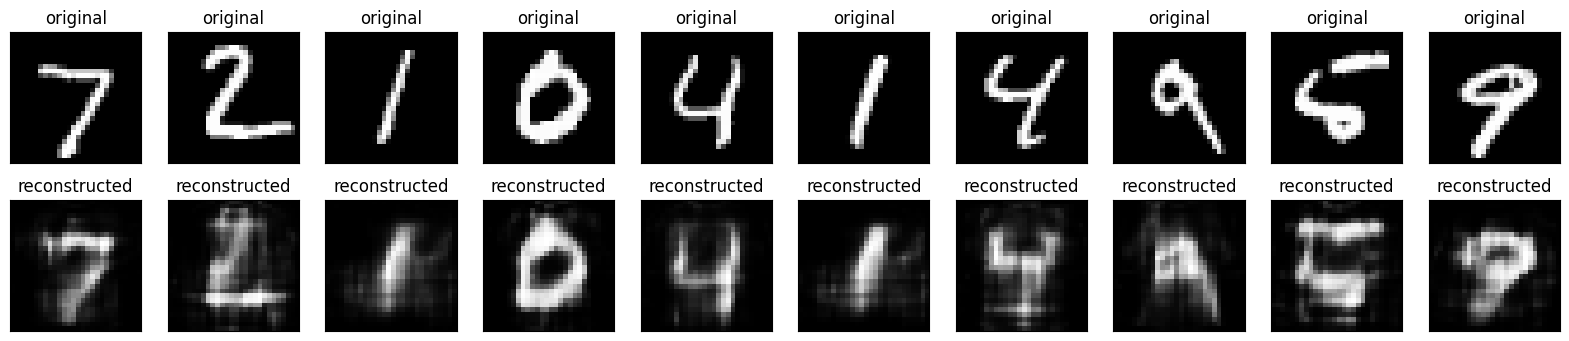

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_new[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs_new[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

We observe that while there is an obvious decrease in quality of reconstructed images from the MNIST Dataset when compared to the Fashion_MNIST Dataset, it performs fairly well!

---


**Question 3**: Give one reason each for (i) why our autoencoder model didn't perform as well on the MNIST Dataset as it did on the Fashion MNIST Dataset and (ii) why it can be said that our autoencoder model actually performed fairly well on the MNIST Dataset.

**Answer:** Trained on more complicated model, can work effectively well on the simpler one




---

## 2. Image denoising


![Image denoising results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/image_denoise_fmnist_results.png?raw=1)

An autoencoder can also be trained to remove noise from images. In the following section, we will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. We will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

For the autoencoder architecture in this section, we will use Convolutional Networks. Hence, we will have to reshape our data to be a 4D tensor.

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("x_train shape before:", x_train.shape)
print("x_test shape before:", x_test.shape)

x_train = x_train[..., tf.newaxis]      # x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]        # x_test = x_test.reshape(10000, 28, 28, 1)

print()
print("x_train shape after:", x_train.shape)
print("x_test shape after::", x_test.shape)

x_train shape before: (60000, 28, 28)
x_test shape before: (10000, 28, 28)

x_train shape after: (60000, 28, 28, 1)
x_test shape after:: (10000, 28, 28, 1)


---


**Question 4**: Why does the input data need to be converted to a 4D tensor?

**Answer:**


---

### Adding random noise to the images

We sample random values from a normal distribution and treat this as noise! We use the `tf.random.normal()` API for this. You can read more about this API [here](https://www.tensorflow.org/api_docs/python/tf/random/normal).

This noise is added to the original data to create noisy data!

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

There is a chance that the data values after adding noise is outside the range [0,1]. A method to ensure all the values are within this range, we use the `tf.clip_by_value()` API. You can read more about this API [here](https://www.tensorflow.org/api_docs/python/tf/clip_by_value).

In [ ]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

### Visualize noisy images.


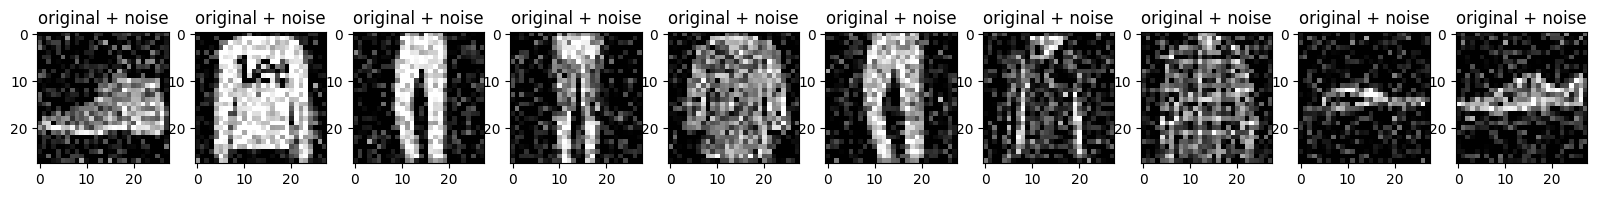

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, we will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

To learn more about Transposed check out this [article](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [ ]:
autoencoder.decoder.build((None, 7, 7, 8)) # `input_shape` is the shape of the input data

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---


**Question 5**: What is the role of the Conv2D() layer in the decoder unit?

**Answer:**


---

We compile the autoencoder model with Adam optimizer and MSE Loss function.

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train Model

Next, we train the model using `x_train_noisy` as the input and `x_train` as the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.0191 - val_loss: 0.0124
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

### Evaluation on Test Dataset
Now that the model is trained to hopefully remove noise, let's test it by encoding and decoding images from the test set.


In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
autoencoder.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0077


0.007731126621365547

### Visualize Denoised Images
In the below cell, we plot 10 noisy images and the corresponding denoised images produced by the autoencoder.

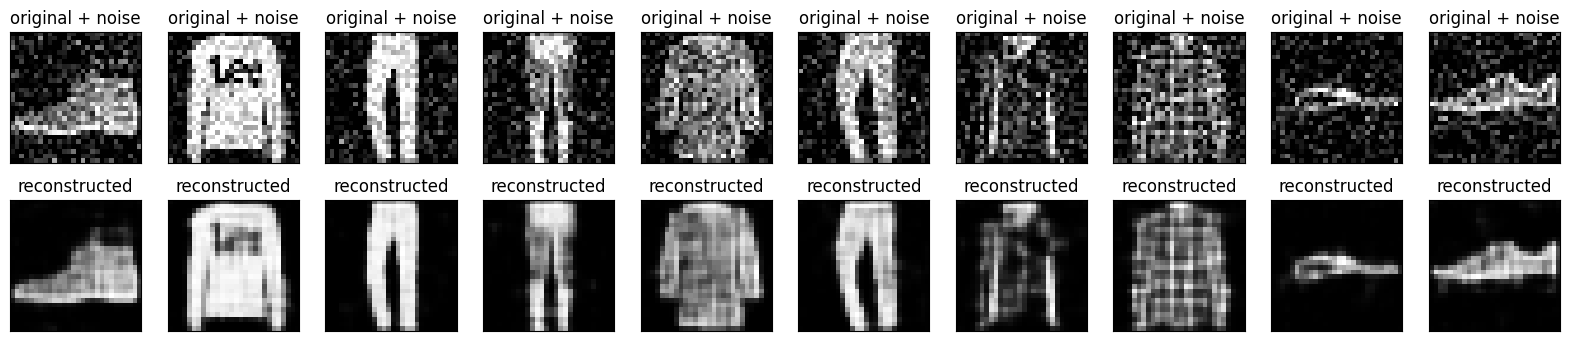

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()